

```
# This is formatted as code
```

Problem 1 Question 1 and 2

In [23]:
import pandas as pd

#this code is to read write and inspect data from bank.csv

bank_df = pd.read_csv('/content/drive/MyDrive/Concept and technologies of AI/bank .csv') #loading the data set
print("Info of the bank dataset:")
print(bank_df.info())

# (a) Columns with dtypes=object
object_columns = bank_df.select_dtypes(include=['object']).columns
print("\nColumns with dtype 'object':", object_columns)

# (b) Unique values of those columns
for col in object_columns:
    print(f"\nUnique values in column '{col}': {bank_df[col].unique()}")

# (c) Total null values in each column
print("\nNull values in each column:")
print(bank_df.isnull().sum())



Info of the bank dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   day       45211 non-null  int64
 3   duration  45211 non-null  int64
 4   campaign  45211 non-null  int64
 5   pdays     45211 non-null  int64
 6   previous  45211 non-null  int64
dtypes: int64(7)
memory usage: 2.4 MB
None

Columns with dtype 'object': Index([], dtype='object')

Null values in each column:
age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64


Problem 1 Question 3 and 4

In [8]:
# 3. Drop object columns and save to new CSV
bank_numeric_df = bank_df.drop(columns=object_columns)
bank_numeric_df.to_csv('/content/drive/MyDrive/Concept and technologies of AI/bank .csv', index=False)

# 4. Load the new CSV and get summary statistics
bank_numeric_df = pd.read_csv('/content/drive/MyDrive/Concept and technologies of AI/bank .csv')
print("\nSummary statistics of bank numeric data:")
print(bank_numeric_df.describe())


Summary statistics of bank numeric data:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000  

Problem 2 Medical student hai

In [10]:
# Problem 2: Data Imputations (medical_student.csv)
# Load the dataset
medical_df = pd.read_csv('/content/drive/MyDrive/Concept and technologies of AI/medical_students_dataset (1).csv')

# 1. Check info and find columns with missing values
print("\nInfo of medical student dataset:")
print(medical_df.info())

missing_values = medical_df.isnull().sum()
print("\nColumns with missing values:")
print(missing_values[missing_values > 0])


Info of medical student dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None

Columns with missing values:
Student ID        20000
Age               20000
Gender            20000
Heigh

In [13]:
# 2. Fill missing values
# Filling with mean for numeric columns and mode for categorical columns

for col in medical_df.columns:
    if medical_df[col].isnull().sum() > 0:
        if medical_df[col].dtype == 'object':
            # Fill missing values with mode
            medical_df[col] = medical_df[col].fillna(medical_df[col].mode()[0])
        else:
            # Fill missing values with mean
            medical_df[col] = medical_df[col].fillna(medical_df[col].mean())


In [14]:
# 3. Check and manage duplicate values
duplicates = medical_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
medical_df.drop_duplicates(inplace=True)



Number of duplicate rows: 12572


Excercise 3.2 Problem 1

In [24]:
titanic_df = pd.read_csv('/content/drive/MyDrive/Concept and technologies of AI/Titanic-Dataset (1).csv')


In [25]:
# Problem 1: Subset and analyze 'Fare' column for Pclass=1
titanic_subset = titanic_df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']][titanic_df['Pclass'] == 1]
print("\nFare statistics for first-class passengers:")
print("Mean:", titanic_subset['Fare'].mean())
print("Median:", titanic_subset['Fare'].median())
print("Max:", titanic_subset['Fare'].max())
print("Min:", titanic_subset['Fare'].min())


Fare statistics for first-class passengers:
Mean: 84.1546875
Median: 60.287499999999994
Max: 512.3292
Min: 0.0


In [26]:
# Problem 2: Null values in 'Age' column and dropping them
print("\nNull values in 'Age' column:", titanic_subset['Age'].isnull().sum())
titanic_subset = titanic_subset.dropna(subset=['Age'])


Null values in 'Age' column: 30


In [27]:
# Problem 3: One-hot encoding 'Embarked' column
# 1,2,3 and 4 sabai esma xa
embarked_encoded = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked')
titanic_df = pd.concat([titanic_df, embarked_encoded], axis=1)
titanic_df.drop(columns=['Embarked'], inplace=True)
print("\nModified Titanic DataFrame with one-hot encoding:")
print(titanic_df.head())


Modified Titanic DataFrame with one-hot encoding:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   

In [28]:
# Problem 4: Survival rate by gender
gender_survival = titanic_df.groupby('Sex')['Survived'].mean()
print("\nMean survival rates by gender:")
print(gender_survival)



Mean survival rates by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


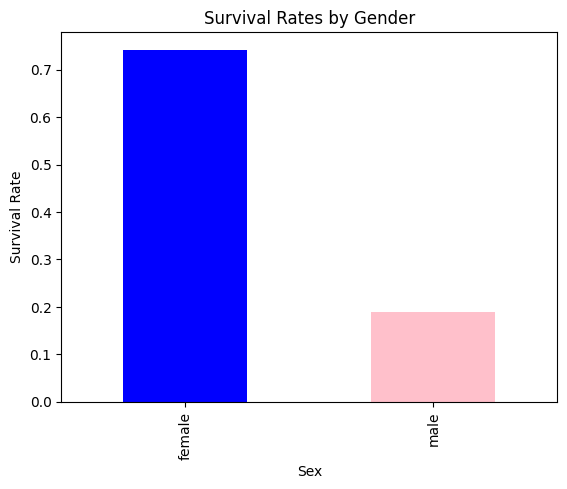

In [30]:
# Visualization
import matplotlib.pyplot as plt
gender_survival.plot(kind='bar', color=['blue', 'pink'], title='Survival Rates by Gender')
plt.ylabel('Survival Rate')
plt.show()


Problem 5

In [33]:
# Problem 5: Survival rate by embarkation port
embark_survival = titanic_df.groupby(['Embarked_C', 'Embarked_Q', 'Embarked_S'])['Survived'].mean()
print("\nSurvival rates by embarkation port:")
print(embark_survival)




Survival rates by embarkation port:
Embarked_C  Embarked_Q  Embarked_S
False       False       False         1.000000
                        True          0.336957
            True        False         0.389610
True        False       False         0.553571
Name: Survived, dtype: float64
